## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Combine_Mouse_Study = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "left")
Combine_Mouse_Study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
Combine_Mouse_Study.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicaterowsDF = Combine_Mouse_Study.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
duplicaterowsDF["Mouse ID"]

0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1888, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicaterowsDF


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleancmdDF = Combine_Mouse_Study.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
cleancmdDF



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(cleancmdDF["Mouse ID"].unique())
num_mice

249

In [7]:
cleancmdDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1888 non-null   object 
 1   Drug Regimen        1888 non-null   object 
 2   Sex                 1888 non-null   object 
 3   Age_months          1888 non-null   int64  
 4   Weight (g)          1888 non-null   int64  
 5   Timepoint           1888 non-null   int64  
 6   Tumor Volume (mm3)  1888 non-null   float64
 7   Metastatic Sites    1888 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.8+ KB


In [8]:

Drug_mean = cleancmdDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Drug_median = cleancmdDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Drug_var = cleancmdDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Drug_sv = cleancmdDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Drug_SEM = cleancmdDF.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

drugtreatment = pd.DataFrame({"Mean": Drug_mean, "Median": Drug_median, "Var": Drug_var, "stdv": Drug_sv, "SEM": Drug_SEM})
drugtreatment.head()

,Mean,Median,Var,stdv,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


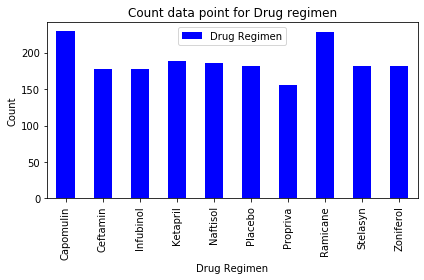

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
drugtreatment = cleancmdDF.groupby('Drug Regimen')
drugtreatment_count = pd.DataFrame(drugtreatment['Drug Regimen'].count())
count_chart = drugtreatment_count.plot(kind='bar', title="Count data point for Drug regimen", color="blue" )
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Count")
plt.tight_layout()
plt.show()


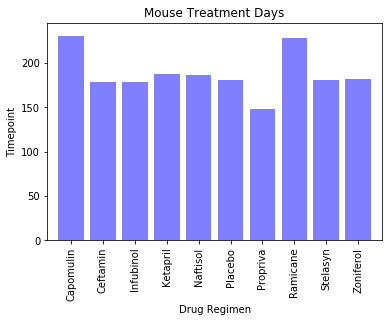

In [10]:
#set axis and ticks
treatment = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
days = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

treatment = np.arange(len(drugtreatment))
tick_locations = []
for x in treatment:
    tick_locations.append(x)
    
plt.title("Mouse Treatment Days")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")

plt.xlim(-0.75, len(treatment)-0.25)
plt.ylim(0, max(days) + 15)

plt.bar(treatment, days, facecolor="blue", alpha=0.50, align="center")
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], rotation='vertical')
plt.show()




In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_pie = cleancmdDF.groupby(['Sex', 'Mouse ID']).size()
gender_pie = pd.DataFrame(gender_pie.groupby(['Sex']).count())
gender_pie.columns = ['Total Gender Count']
gender_pie['% of Gender'] = (100*(gender_pie['Total Gender Count']/gender_pie['Total Gender Count'].sum()))
gender_pie

,Total Gender Count,% of Gender
Sex,,
Female,124,49.799197
Male,125,50.200803


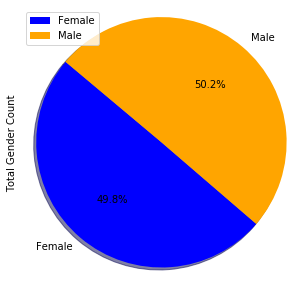

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
colors = ["blue", "orange"]
explode = (0.1, 0)

#plt.title("Mice Distribution by Gender")
plot = gender_pie.plot.pie(y='Total Gender Count', figsize=(5, 5), labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plot.legend(loc="upper left")
plot.axis("equal")
plt.show()

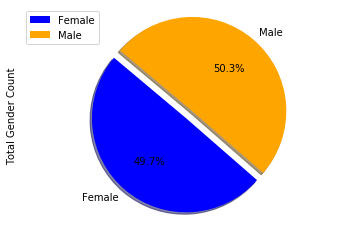

In [38]:
labels = ["Female", "Male"]
percent = [49.799197, 50.403226]
colors = ["blue", "orange"]
explode = (0.1, 0)
#plt.title("Mice Distribution by Gender")
plt.pie(percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.legend(loc="best")
plt.ylabel("Total Gender Count")
plt.axis("equal")
plt.show()

In [88]:
final = cleancmdDF[cleancmdDF["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top4drugs = final.sort_values(["Timepoint"], ascending=True)
top4drugsfinal = drugs_final[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]]
top4drugsfinals = pd.DataFrame(top4drugsfinal)
top4drugsfinals.reset_index()

,index,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,0,Ramicane,k403,45.000000
1,1,Ramicane,k403,38.825898
2,2,Ramicane,k403,35.014271
3,3,Ramicane,k403,34.223992
4,4,Ramicane,k403,32.997729
...,...,...,...,...
809,1868,Infubinol,z581,54.316407
810,1869,Infubinol,z581,56.286750
811,1870,Infubinol,z581,58.628399
812,1871,Infubinol,z581,60.053740


## Quartiles, Outliers and Boxplots

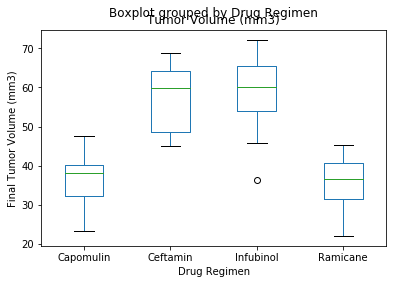

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
...,...,...,...
95,Ramicane,s508,30.276232
96,Ramicane,u196,40.667713
97,Ramicane,w678,43.166373
98,Ramicane,y449,44.183451


In [92]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
finaltumorvolume = top4drugsfinals.groupby(["Drug Regimen", "Mouse ID"]).last()['Tumor Volume (mm3)']
top4final_df = pd.DataFrame(finaltumorvolume)
top4final_df.reset_index()

top4final_df.boxplot(by='Drug Regimen', column=['Tumor Volume (mm3)'], grid=False)

plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()



# Create an ndarray with four columns and 20 rows
                                          
#plot.title("Mouse L509 Capomulin Treatment")

finaltumorvolume = top_4_drugs_finals.groupby(["Drug Regimen", "Mouse ID"]).last()['Tumor Volume (mm3)']
finaltumorvolume = pd.DataFrame(finaltumorvolume)
finaltumorvolume.reset_index()



## Line and Scatter Plots

In [111]:
capomulin_data_lineplot = cleancmdDF.loc[cleancmdDF["Drug Regimen"]=="Capomulin" ]
capomulin_mouse = capomulin_data_lineplot.loc[capomulin_data_lineplot["Mouse ID"]=="s185"]
capomulin_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


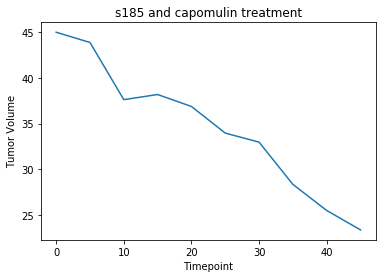

In [119]:
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
plt.title("s185 and capomulin treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.show()


In [128]:
average_tumor_volume = capomulin_data_lineplot.groupby(["Mouse ID"]).mean()
average_tumor_volume


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


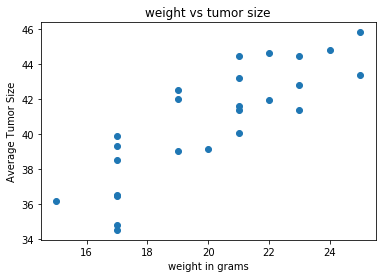

In [129]:
average_tumor_volume = capomulin_data_lineplot.groupby(["Mouse ID"]).mean()


plt.scatter(average_tumor_volume["Weight (g)"], average_tumor_volume["Tumor Volume (mm3)"])
plt.title("weight vs tumor size")
plt.xlabel("weight in grams")
plt.ylabel("Average Tumor Size")
plt.show()




In [106]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 

# for mouse weight and average tumor volume for the Capomulin regimen


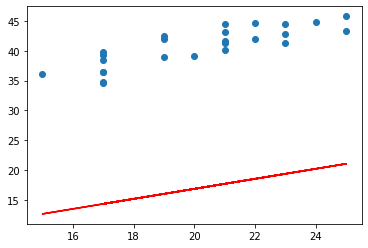

In [135]:
plt.scatter(average_tumor_volume["Weight (g)"], average_tumor_volume["Tumor Volume (mm3)"])
yvalues=average_tumor_volume["Weight (g)"]*correlation[0]+correlation[1]
plt.plot(average_tumor_volume["Weight (g)"], yvalues, color="red")
plt.show()


In [132]:

correlation = st.pearsonr(average_tumor_volume["Weight (g)"],
average_tumor_volume["Tumor Volume (mm3)"])
correlation_round = round(correlation[0], 2)
correlation_round


0.84